# Analyse frequency distribution of words

## Installation des dépendences

In [1]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emeld\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Création d'une liste de stopwords

In [2]:
from nltk.corpus import stopwords

sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu"]
sw = set(sw)

In [3]:
print(f"{len(sw)} stopwords used: {sorted(sw)}")

197 stopwords used: ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'het', 'il', 'ils', 'j', 'je', 'jusqu', 'l', 'la', 'le', 'les', 'leur', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'moins', 'mon', 'même', 'n', 'ne', '

## Visualiser les termes les plus fréquents

In [8]:
path = "../data/all.txt"
limit = 10**8

with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]

In [9]:
# détecter les mots
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

24948338 words found


In [10]:
words[:10]

['V', 'I', 'L', 'L', 'E', 'DE', 'BRUXELLES', 'bulletin', 'ires', '8éanas']

In [11]:
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

6475647 words kept (154719 different word forms)


In [1]:
fdist = nltk.FreqDist(kept)
fdist.most_common(10)

NameError: name 'nltk' is not defined

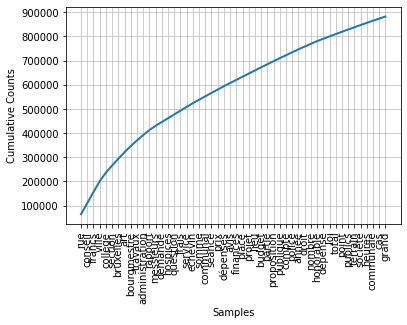

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [13]:
fdist.plot(50, cumulative=True)

In [ ]:
# Impression des mots qui n'apparaissent qu'une fois dans le corpus
fdist.hapaxes()[:30]

In [ ]:
long_words = [w for w in voc if len(w) > 15]
sorted(long_words)[:30]

In [ ]:
#Mots clefs par décennie 

In [ ]:
from os import listdir
from os.path import isfile, join

data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in listdir(txt_path) if isfile(join(txt_path, f)) and str(YEAR) in f]

content_list = []
for txt in txts:
    with open(f'{txt_path}/{txt}', encoding='utf-8') as f:
        content_list.append(f.read())

with open(f'{YEAR}.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

with open(f'{YEAR}.txt', 'r', encoding='utf-8' ) as f:
    before = f.read()

from filtering import filtering
filtering(YEAR)


In [ ]:
with open(f'{YEAR}_keywords.txt', 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

In [ ]:
import subprocess

command = [
    'wordcloud_cli',
    '--text', f'{YEAR}_keywords.txt',
    '--imagefile', f'{YEAR}.png',
    '--width', '2000',
    '--height', '1000',
]

subprocess.run(command, capture_output=True)

In [ ]:
from IPython.display import Image

Image(filename=f'{YEAR}.png')

In [26]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk

nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\emeld\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
data_path = "../data/txt/"

DECADE = '1920'

files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
texts = [open(data_path + f, encoding='utf8', errors='ignore').read() for f in files]

In [28]:
txts = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
content_list = []
for txt in txts:
    with open(f'{data_path}/{txt}', encoding='utf-8') as f:
        content_list.append(f.read())

In [29]:
len(content_list)

178

In [30]:
with open(f'{DECADE[:-1]}.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

with open(f'{DECADE[:-1]}.txt', 'r', encoding='utf-8' ) as f:
    before = f.read()

from filtering import filtering

filtering(DECADE[:-1])

'Output has been written in 192_keywords.txt!'

In [31]:
import subprocess

command = [
    'wordcloud_cli',
    '--text', f'{DECADE[:-1]}_keywords.txt',
    '--imagefile', f'{DECADE[:-1]}.png',
    '--width', '2000',
    '--height', '1000',
]

subprocess.run(command, capture_output=True)

CompletedProcess(args=['wordcloud_cli', '--text', '192_keywords.txt', '--imagefile', '192.png', '--width', '2000', '--height', '1000'], returncode=0, stdout=b'', stderr=b'')

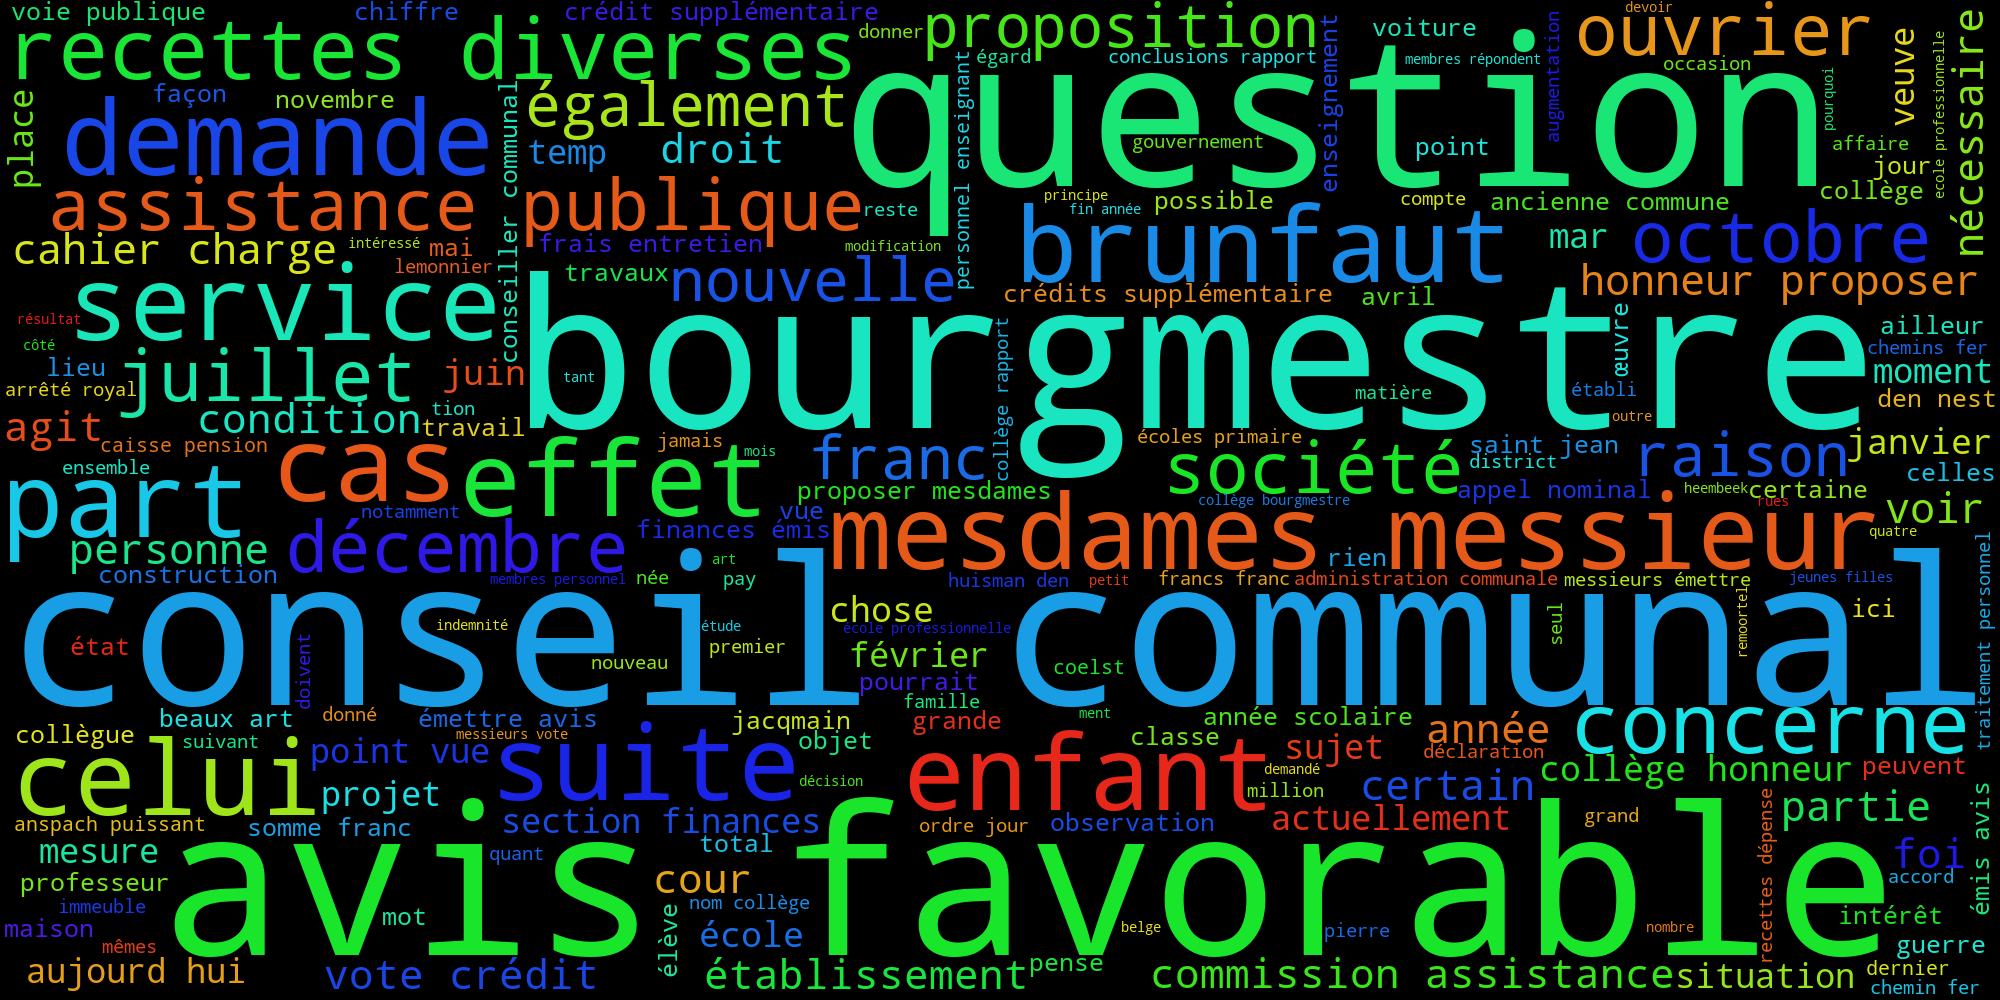

In [32]:
from IPython.display import Image

Image(filename=f'{DECADE[:-1]}.png')

In [ ]:
import os
import yake

ignored = set(["conseil communal", "conseil général"])
kw_extractor = yake.KeywordExtractor(lan="fr", top=20)

for f in sorted(files):
    text = open(f'{data_path}/{f}', encoding='utf-8').read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for score, kw in keywords:
        words = kw.split()
        if len(words) > 1 and kw not in ignored:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")